In [2]:
#!pip install geopandas

In [3]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [4]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [5]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [6]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [7]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [8]:
annee = ["2002","2008","2012","2018"]

In [9]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [10]:
#Incidence Lung cancer
lcm = pd.DataFrame(evolution, columns=['Lung_C2M', 'Lung_C8M', 'Lung_C12M', 'Lung_C18M']).transpose()
lcw = pd.DataFrame(evolution, columns=['Lung_C2F', 'Lung_C8F', 'Lung_C12F',  'Lung_C18F']).transpose()
        
#Both men and women

lcm.index = annee
lcw.index = annee
lungsomme = lcm.add(lcw).transpose()/2
lcm+lcw

,North,West,Central,East,South
2002,14.2,3.0,5.4,5.8,30.0
2008,17.1,4.3,3.7,5.5,37.0
2012,18.7,2.8,2.8,6.0,36.3
2018,20.3,3.6,6.1,5.6,34.9


In [11]:
lungsomme

,2002,2008,2012,2018
North,7.1,8.55,9.35,10.15
West,1.5,2.15,1.40,1.80
Central,2.7,1.85,1.40,3.05
East,2.9,2.75,3.00,2.80
South,15.0,18.50,18.15,17.45


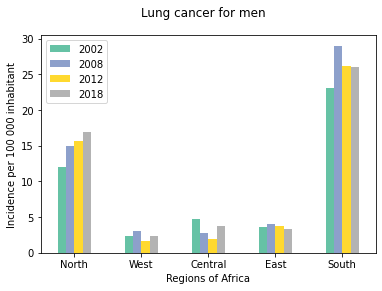

In [12]:
cmap = cm.get_cmap('Set2')
lcm.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer for men')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
#plt.savefig('Figures/lung2.png')
plt.show()

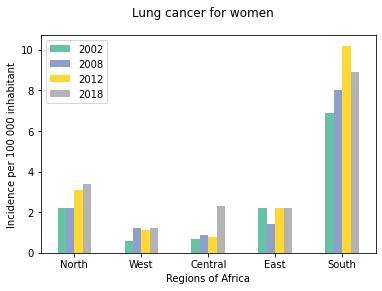

In [13]:
lcw.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer for women')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
#plt.savefig('Figures/lung3.png')
plt.show()

In [14]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [15]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [16]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [17]:
orient = earth[earth.continent=='Asia'].copy()
pal = orient[orient.name=='Palestine']
pal.to_csv(r'earth.csv', index = False)

In [18]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [19]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
154,5918919,Africa,Eritrea,ERI,9169.0,"POLYGON ((36.42951 14.42211, 36.32322 14.82249...",East
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",North
60,24184810,Africa,Côte d'Ivoire,CIV,87120.0,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",West
61,12413867,Africa,Guinea,GIN,16080.0,"POLYGON ((-13.70048 12.58618, -13.21782 12.575...",West
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",West


In [20]:
lungsomme

,2002,2008,2012,2018
North,7.1,8.55,9.35,10.15
West,1.5,2.15,1.40,1.80
Central,2.7,1.85,1.40,3.05
East,2.9,2.75,3.00,2.80
South,15.0,18.50,18.15,17.45


In [21]:
LC = lungsomme['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2002'] = reg

LC = lungsomme['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2008'] = reg

LC = lungsomme['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2012'] = reg

LC = lungsomme['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
#print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2018'] = reg


Central
2.7
Central
1.8499999999999999
Central
1.4


In [22]:
africa.sample()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Lung2002,Lung2008,Lung2012,Lung2018
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",East,2.9,2.75,3.0,2.8


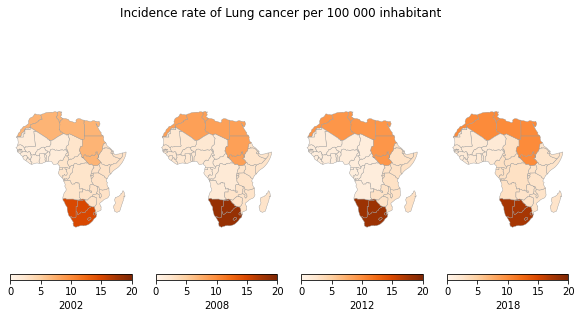

In [23]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#from cartopy import crs as ccrs

vmin, vmax = 0, 20
cmap = cm.get_cmap('Oranges')
#, vmin=vmin, vmax=vmax
#plt.savefig('Figures/.png')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Lung cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Lung2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Lung2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Lung2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Lung2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
#ax = plt.gca()
#ax.set_xlim(0, 20)
#plt.savefig('Figures/lung1.png')
plt.show()

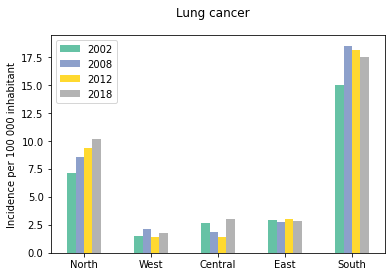

In [24]:
#cmap = cm.get_cmap('Greens')
cmap = cm.get_cmap('Set2')
index = ['North', 'West', 'Central', 'East', 'South']
df = pd.DataFrame(lungsomme, index=index)
ax = df.plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/lung4.png')
plt.show()

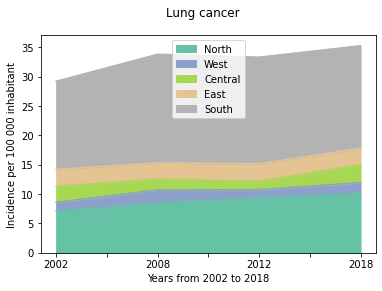

In [25]:
df.transpose().plot.area(cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
#plt.savefig('Figures/lung5.png')
plt.show()

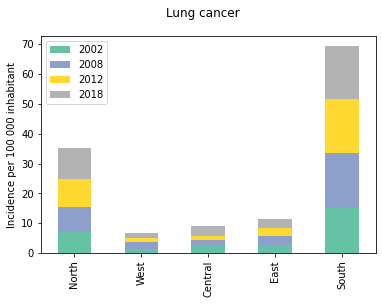

In [26]:
df.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/lung6.png')
plt.show()

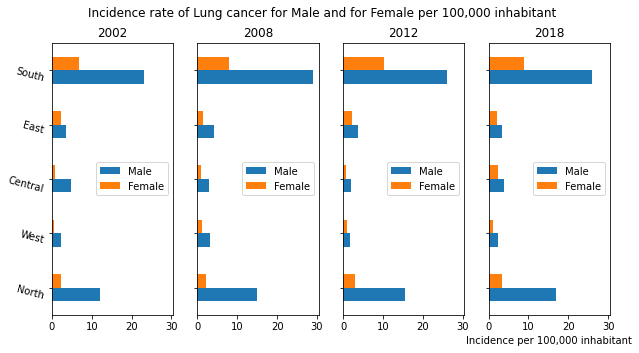

In [28]:
# A python dictionary

data2002 = {"Male":lcm.iloc[0], "Female":lcw.iloc[0], }; 
data2002 = pd.DataFrame(data=data2002, index=index);

data2008 = {"Male":lcm.iloc[1], "Female":lcw.iloc[1], }; 
data2008 = pd.DataFrame(data=data2008, index=index);

data2012 = {"Male":lcm.iloc[2], "Female":lcw.iloc[2], }; 
data2012 = pd.DataFrame(data=data2012, index=index);

data2018 = {"Male":lcm.iloc[3], "Female":lcw.iloc[3], }; 
data2018 = pd.DataFrame(data=data2018, index=index);

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Lung cancer for Male and for Female per 100,000 inhabitant')
    
p1 = data2002.plot.barh(stacked=False, rot=-15, ax=axs[0], title="2002");
p2 = data2008.plot.barh(stacked=False, rot=-15, ax=axs[1], title="2008");
p3 = data2012.plot.barh(stacked=False, rot=-15, ax=axs[2], title="2012");
p4 = data2018.plot.barh(stacked=False, rot=-15, ax=axs[3], title="2018");

plt.xlabel('Incidence per 100,000 inhabitant')
plt.ylabel('Regions of Africa')
plt.legend()
#plt.savefig('Figures/lung7.png')
plt.show(block=True);